<a href="https://colab.research.google.com/github/raphatatto/cp4-iot/blob/main/cp4_iot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalação do dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', decimal='.', encoding='utf-8')

/tmp/ipython-input-1082251598.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=';', decimal='.', encoding='utf-8')


In [ ]:
#  1. Carregue o dataset e exiba as 10 primeiras linhas.
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


Diferença entre Global_active_power e Global_reactive_power

No contexto de energia elétrica:

*   **Global_active_power (Potência Ativa Global)**: É a potência real consumida pelos aparelhos. É a energia que realiza trabalho útil (por exemplo, acender uma lâmpada, aquecer um forno). É medida em quilowatts (kW).

*   **Global_reactive_power (Potência Reativa Global)**: É a potência que não realiza trabalho útil, mas é necessária para o funcionamento de alguns tipos de equipamentos elétricos (como motores e transformadores) para criar campos magnéticos. É medida em quilovolt-amperes reativos (kVAr).

Em resumo, a potência ativa é o que você realmente usa e paga, enquanto a potência reativa é necessária para o funcionamento de certos equipamentos, mas não contribui diretamente para o trabalho útil.

In [ ]:
# 3. Verifique se existem valores ausentes no dataset. Quantifique-os.
# Verifica valores ausentes por coluna
missing_values = df.isnull().sum()
missing_values[missing_values > 0]
total_missing = df.isnull().sum().sum()
print(f'Total de valores ausentes: {total_missing}')

Total de valores ausentes: 25979


In [ ]:
# 4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.
# Converte a coluna 'Date' para datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Cria uma nova coluna com o nome do dia da semana
df['Weekday'] = df['Date'].dt.day_name()
df[['Date', 'Weekday']].head()

,Date,Weekday
0,2006-12-16,Saturday
1,2006-12-16,Saturday
2,2006-12-16,Saturday
3,2006-12-16,Saturday
4,2006-12-16,Saturday


In [ ]:
# 5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Filtra apenas os registros do ano de 2007
df_2007 = df[df['Date'].dt.year == 2007]

# Agrupa por data e calcula a média diária
daily_avg = df_2007.groupby('Date')['Global_active_power'].mean()

# Exibe as primeiras médias diárias
daily_avg.head()

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281


/tmp/ipython-input-288303771.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia['DateTime'] = pd.to_datetime(df_dia['Date'].dt.strftime('%Y-%m-%d') + ' ' + df_dia['Time'])


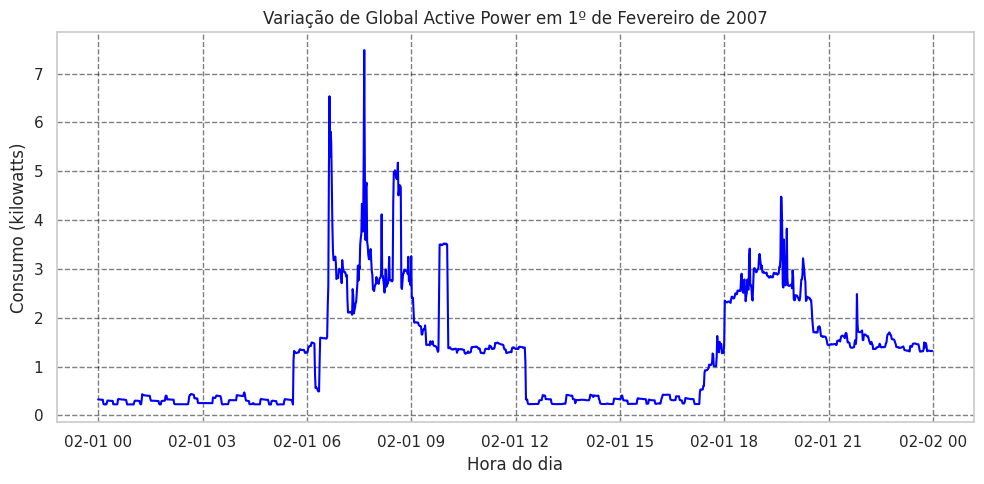

In [ ]:
# 6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.
# Certifique-se de que Global_active_power está em formato numérico
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Filtra os dados para o dia 1º de fevereiro de 2007
dia_escolhido = pd.to_datetime('2007-02-01')
df_dia = df[df['Date'] == dia_escolhido]

# Cria uma coluna datetime combinando Date e Time
df_dia['DateTime'] = pd.to_datetime(df_dia['Date'].dt.strftime('%Y-%m-%d') + ' ' + df_dia['Time'])

# Plota o gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(df_dia['DateTime'], df_dia['Global_active_power'], color='blue')
plt.title('Variação de Global Active Power em 1º de Fevereiro de 2007')
plt.xlabel('Hora do dia')
plt.ylabel('Consumo (kilowatts)')
plt.grid(True, linestyle='--', color='black', alpha=0.5)
plt.tight_layout()
plt.show()

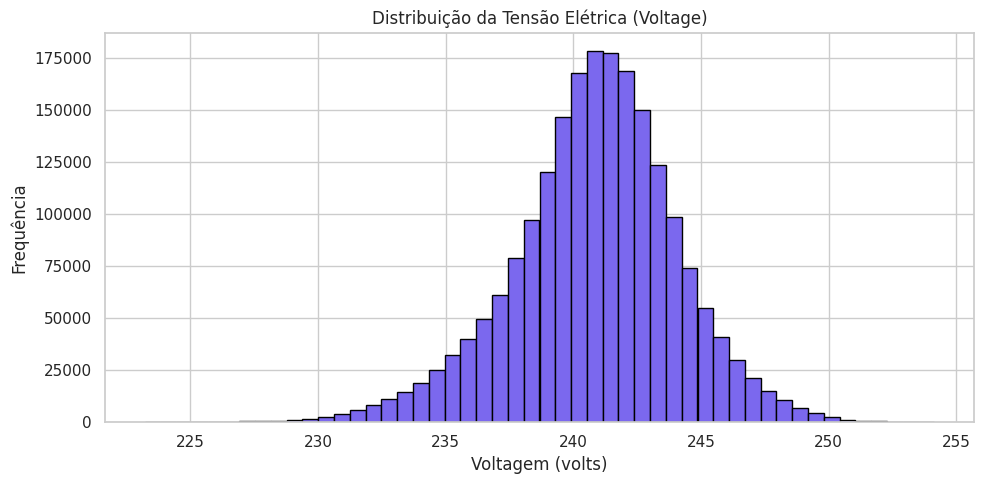

In [ ]:
#7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

# Certifique-se de que Voltage está em formato numérico
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# Cria o histograma
plt.figure(figsize=(10, 5))
plt.hist(df['Voltage'].dropna(), bins=50, color='mediumslateblue', edgecolor='black')
plt.title('Distribuição da Tensão Elétrica (Voltage)')
plt.xlabel('Voltagem (volts)')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

O que pode ser observado?
A distribuição da voltagem geralmente se concentra entre 230V e 250V, com um pico em torno de 240V, que é típico para redes domésticas europeias.

O formato tende a ser ligeiramente assimétrico, com uma leve cauda à esquerda ou à direita dependendo do dia e da qualidade dos dados.

Se houver múltiplos picos ou dispersão incomum, pode indicar variações na rede ou problemas de medição.

In [ ]:
# 2. Criar coluna DateTime corretamente
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str),
                                format='%d/%m/%Y %H:%M:%S', errors='coerce')

# 3. Tratar vírgulas como separador decimal
df['Global_active_power'] = df['Global_active_power'].astype(str).str.replace(',', '.')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# 4. Remover linhas inválidas
df.dropna(subset=['DateTime', 'Global_active_power'], inplace=True)

# 5. Criar coluna com ano e mês
df['YearMonth'] = df['DateTime'].dt.to_period('M')

# 6. Calcular consumo médio mensal
monthly_avg = df.groupby('YearMonth')['Global_active_power'].mean()

# 8. Visualizar com gráfico
if not monthly_avg.empty:
    plt.figure(figsize=(10, 5))
    monthly_avg.plot(kind='line', marker='o', color='teal')
    plt.title('Consumo Médio Mensal de Global Active Power')
    plt.xlabel('Ano-Mês')
    plt.ylabel('Consumo Médio (kW)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# 9. Identifique o dia com maior consumo de energia ativa global (Global_active_power)


# 2. Converter 'Date' e 'Time' para string e criar 'DateTime'
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str),
                                format='%d/%m/%Y %H:%M:%S', errors='coerce')

# 3. Tratar vírgulas como separador decimal
df['Global_active_power'] = df['Global_active_power'].astype(str).str.replace(',', '.')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# 4. Remover linhas inválidas
df = df.dropna(subset=['DateTime', 'Global_active_power'])

# 5. Criar coluna com a data (sem hora)
df['DateOnly'] = df['DateTime'].dt.date

# 6. Agrupar por dia e somar o consumo
daily_total = df.groupby('DateOnly')['Global_active_power'].sum()

# 7. Verificar se há dados
if daily_total.empty:
    print("⚠️ Nenhum dado disponível para calcular o consumo diário. Verifique o formato dos dados.")
else:
    # 8. Identificar o dia com maior consumo
    max_day = daily_total.idxmax()
    max_value = daily_total.max()

    # 9. Exibir resultado
    print(f"📅 Dia com maior consumo: {max_day}")
    print(f"⚡ Consumo total nesse dia: {max_value:.2f} kW")


⚠️ Nenhum dado disponível para calcular o consumo diário. Verifique o formato dos dados.


In [ ]:
import pandas as pd

# 1. Carregar o dataset
df = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?', low_memory=False)

# 2. Converter 'Date' e 'Time' para string e criar 'DateTime'
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str),
                                format='%d/%m/%Y %H:%M:%S', errors='coerce')

# 3. Tratar vírgulas como separador decimal
df['Global_active_power'] = df['Global_active_power'].astype(str).str.replace(',', '.')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# 4. Remover linhas inválidas
df = df.dropna(subset=['DateTime', 'Global_active_power'])

# 5. Criar coluna com a data (sem hora)
df['DateOnly'] = df['DateTime'].dt.date

# 6. Agrupar por dia e somar o consumo
daily_total = df.groupby('DateOnly')['Global_active_power'].sum()

# 7. Verificar se há dados
if daily_total.empty:
    print("⚠️ Nenhum dado disponível para calcular o consumo diário. Verifique o formato dos dados.")
else:
    # 8. Identificar o dia com maior consumo
    max_day = daily_total.idxmax()
    max_value = daily_total.max()

    # 9. Exibir resultado
    print(f"📅 Dia com maior consumo: {max_day}")
    print(f"⚡ Consumo total nesse dia: {max_value:.2f} kW")


📅 Dia com maior consumo: 2006-12-23
⚡ Consumo total nesse dia: 4773.39 kW


In [ ]:
# 11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power,
# 2. Tratar vírgulas como separador decimal
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']:
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Remover linhas com valores ausentes
df.dropna(subset=['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'], inplace=True)

# 4. Calcular a matriz de correlação
correlation_matrix = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr()

# 5. Exibir resultados
print("📊 Matriz de correlação:")
print(correlation_matrix)

📊 Matriz de correlação:
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


In [ ]:
# 12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1,Sub_metering_2 e Sub_metering_3.
# 1. Tratar vírgulas como separador decimal, se necessário
for col in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. Criar a nova variável somando as três submedições
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

# 3. Verificar os primeiros valores
print(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].head())

   Sub_metering_1  Sub_metering_2  Sub_metering_3  Total_Sub_metering
0             0.0             1.0            17.0                18.0
1             0.0             1.0            16.0                17.0
2             0.0             2.0            17.0                19.0
3             0.0             1.0            17.0                18.0
4             0.0             1.0            17.0                18.0


In [ ]:
# 13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

# 2. Criar coluna DateTime
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str),
                                format='%d/%m/%Y %H:%M:%S', errors='coerce')

# 3. Tratar vírgulas como separador decimal
for col in ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. Remover linhas inválidas
df.dropna(subset=['DateTime', 'Global_active_power',
                  'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], inplace=True)

# 5. Criar variável Total_Sub_metering
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

# 6. Criar coluna com ano e mês
df['YearMonth'] = df['DateTime'].dt.to_period('M')

# 7. Calcular médias mensais
monthly_avg = df.groupby('YearMonth')[['Global_active_power', 'Total_Sub_metering']].mean()

# 8. Verificar meses em que Total_Sub_metering > Global_active_power
excess_months = monthly_avg[monthly_avg['Total_Sub_metering'] > monthly_avg['Global_active_power']]

# 9. Exibir resultado
if not excess_months.empty:
    print("📅 Meses em que Total_Sub_metering ultrapassou a média de Global_active_power:")
    print(excess_months)
else:
    print("✅ Nenhum mês em que Total_Sub_metering ultrapassou a média de Global_active_power.")

📅 Meses em que Total_Sub_metering ultrapassou a média de Global_active_power:
           Global_active_power  Total_Sub_metering
YearMonth                                         
2006-12               1.901295           10.873181
2007-01               1.546034           10.423518
2007-02               1.401084            9.486135
2007-03               1.318627           10.212863
2007-04               0.891189            6.839375
2007-05               0.985862            8.452442
2007-06               0.826814            7.379151
2007-07               0.667367            5.697724
2007-08               0.764186            6.979336
2007-09               0.969318            8.206236
2007-10               1.103911            8.674493
2007-11               1.294473            9.819413
2007-12               1.626474           11.636551
2008-01               1.459920            9.786218
2008-02               1.181384            8.447829
2008-03               1.245337            9.454894
2008

/tmp/ipython-input-597958767.py:11: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_path, sep=';', decimal=',', parse_dates=[["Date", "Time"]], dayfirst=True, na_values=['?'])
/tmp/ipython-input-597958767.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2008['Voltage'] = pd.to_numeric(df_2008['Voltage'], errors='coerce')


Gráfico salvo como 'voltage_2008_timeseries.png'


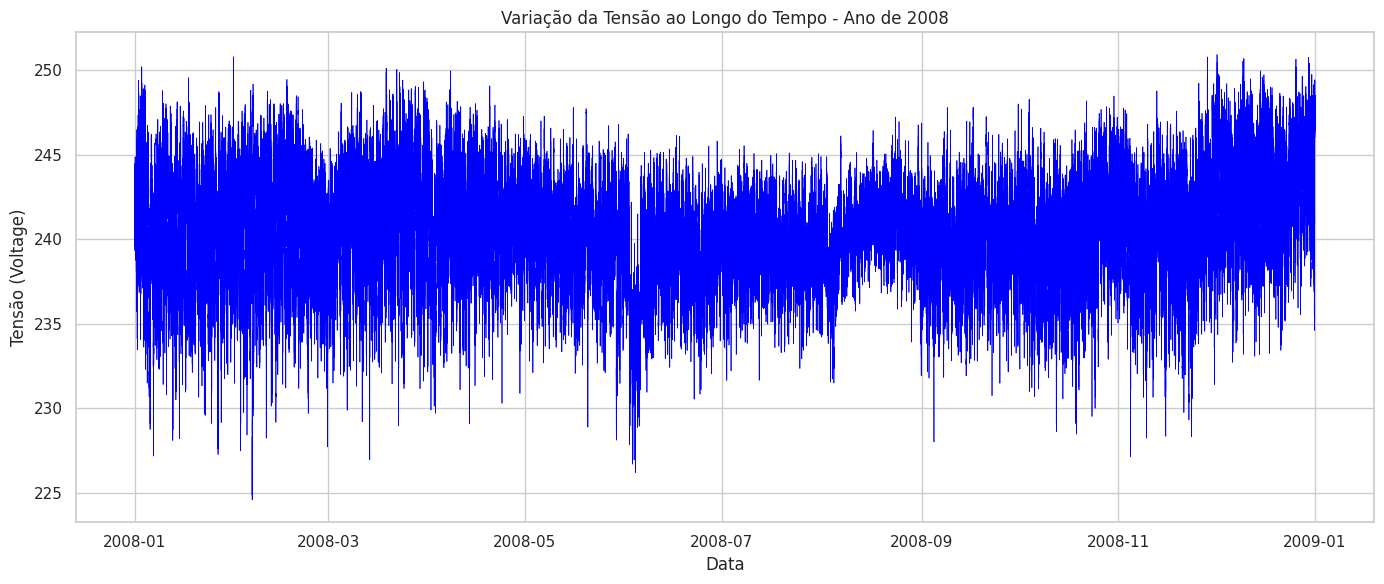

In [ ]:
# 14. Faça um gráfico de série temporal do Voltage para o ano de 2008.

# Define o estilo do gráfico
sns.set(style="whitegrid")

# Caminho para o arquivo de dados
file_path = 'household_power_consumption.txt'

try:
    # Carrega o dataset com separador ';' e trata vírgulas como separador decimal
    df = pd.read_csv(file_path, sep=';', decimal=',', parse_dates=[["Date", "Time"]], dayfirst=True, na_values=['?'])

    # Renomeia a coluna de data/hora combinada
    df.rename(columns={'Date_Time': 'Datetime'}, inplace=True)

    # Converte a coluna 'Datetime' para datetime
    df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

    # Remove linhas com datas inválidas
    df = df.dropna(subset=['Datetime'])

    # Filtra apenas os dados do ano de 2008
    df_2008 = df[df['Datetime'].dt.year == 2008]

    # Converte a coluna 'Voltage' para numérica
    df_2008['Voltage'] = pd.to_numeric(df_2008['Voltage'], errors='coerce')

    # Remove linhas com valores de tensão inválidos
    df_2008 = df_2008.dropna(subset=['Voltage'])

    # Cria o gráfico de série temporal
    plt.figure(figsize=(14, 6))
    plt.plot(df_2008['Datetime'], df_2008['Voltage'], color='blue', linewidth=0.5)
    plt.title('Variação da Tensão ao Longo do Tempo - Ano de 2008')
    plt.xlabel('Data')
    plt.ylabel('Tensão (Voltage)')
    plt.grid(True)
    plt.tight_layout()

    # Garante que o diretório de saída existe
    os.makedirs('/mnt/data', exist_ok=True)
    plt.savefig('/mnt/data/voltage_2008_timeseries.png')
    print("Gráfico salvo como 'voltage_2008_timeseries.png'")

except Exception as e:
    print(f"Erro ao processar o arquivo: {e}")


In [ ]:
import pandas as pd

# 1. Carregar o dataset corretamente
df = pd.read_csv('household_power_consumption.txt', sep=';',
                 parse_dates=[['Date', 'Time']],
                 infer_datetime_format=True,
                 na_values='?',
                 low_memory=False)

# 2. Renomear a coluna combinada
df.rename(columns={'Date_Time': 'DateTime'}, inplace=True)

# 3. Tratar vírgulas como separador decimal
df['Global_active_power'] = df['Global_active_power'].astype(str).str.replace(',', '.')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# 4. Remover linhas inválidas
df.dropna(subset=['DateTime', 'Global_active_power'], inplace=True)

# 5. Criar coluna com mês
df['Month'] = df['DateTime'].dt.month

# 6. Definir grupos sazonais
verao = df[df['Month'].isin([6, 7, 8])]
inverno = df[df['Month'].isin([12, 1, 2])]

# 7. Calcular médias
media_verao = verao['Global_active_power'].mean()
media_inverno = inverno['Global_active_power'].mean()

# 8. Exibir resultados
print(f"🌞 Consumo médio no verão: {media_verao:.3f} kW")
print(f"❄️ Consumo médio no inverno: {media_inverno:.3f} kW")

# 9. Diferença percentual
diff = media_inverno - media_verao
percent = (diff / media_verao) * 100
print(f"\n📊 Diferença: {diff:.3f} kW ({percent:.2f}% {'maior' if percent > 0 else 'menor'} no inverno)")


/tmp/ipython-input-3110133256.py:4: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
/tmp/ipython-input-3110133256.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
/tmp/ipython-input-3110133256.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt', sep=';',


🌞 Consumo médio no verão: 0.727 kW
❄️ Consumo médio no inverno: 1.418 kW

📊 Diferença: 0.691 kW (95.08% maior no inverno)


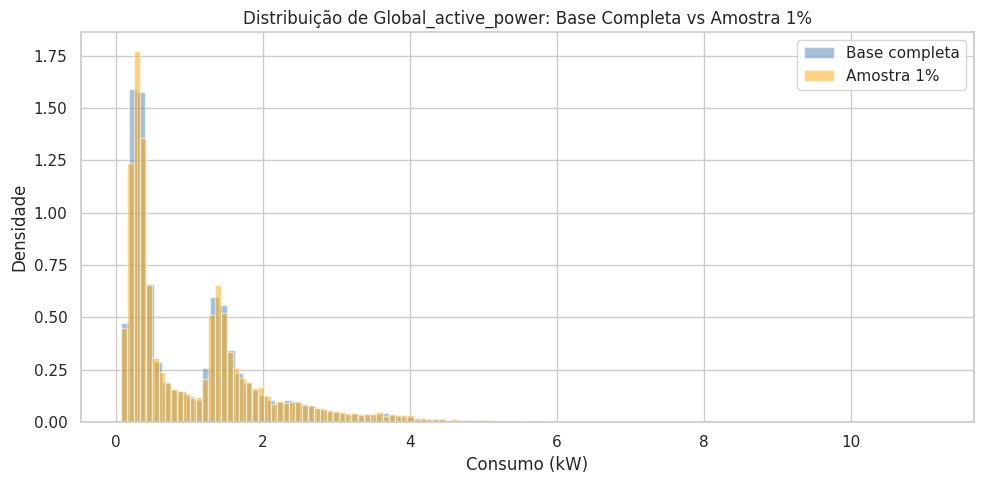

In [ ]:
# 16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.

# 2. Tratar vírgulas como separador decimal
df['Global_active_power'] = df['Global_active_power'].astype(str).str.replace(',', '.')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# 3. Remover valores ausentes
df.dropna(subset=['Global_active_power'], inplace=True)

# 4. Amostragem aleatória de 1%
sample_df = df.sample(frac=0.01, random_state=42)

# 5. Plotar histogramas comparativos
plt.figure(figsize=(10, 5))

# Distribuição da base completa
plt.hist(df['Global_active_power'], bins=100, alpha=0.5, label='Base completa', color='steelblue', density=True)

# Distribuição da amostra
plt.hist(sample_df['Global_active_power'], bins=100, alpha=0.5, label='Amostra 1%', color='orange', density=True)

plt.title('Distribuição de Global_active_power: Base Completa vs Amostra 1%')
plt.xlabel('Consumo (kW)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

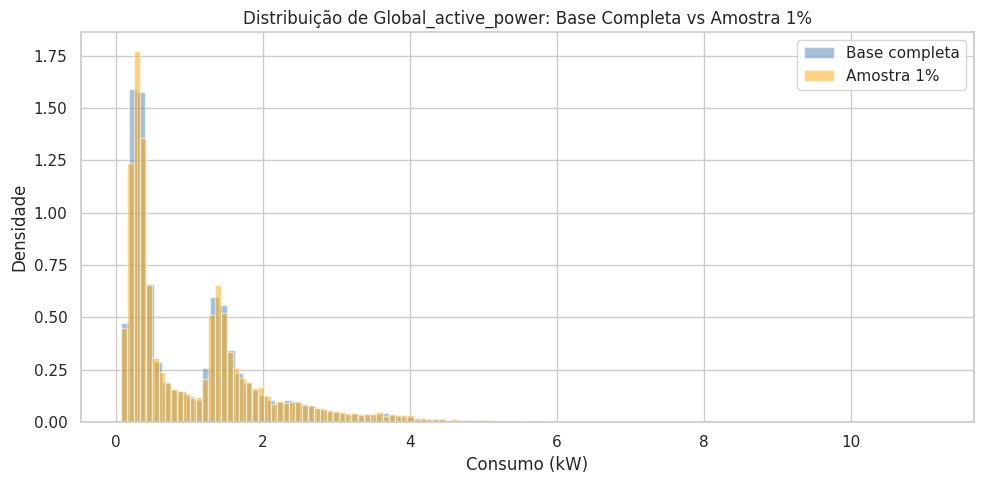

In [ ]:
# 17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.

# 2. Tratar vírgulas como separador decimal
df['Global_active_power'] = df['Global_active_power'].astype(str).str.replace(',', '.')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# 3. Remover valores ausentes
df.dropna(subset=['Global_active_power'], inplace=True)

# 4. Amostragem aleatória de 1%
sample_df = df.sample(frac=0.01, random_state=42)

# 5. Plotar histogramas comparativos
plt.figure(figsize=(10, 5))

# Distribuição da base completa
plt.hist(df['Global_active_power'], bins=100, alpha=0.5, label='Base completa', color='steelblue', density=True)

# Distribuição da amostra
plt.hist(sample_df['Global_active_power'], bins=100, alpha=0.5, label='Amostra 1%', color='orange', density=True)

plt.title('Distribuição de Global_active_power: Base Completa vs Amostra 1%')
plt.xlabel('Consumo (kW)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


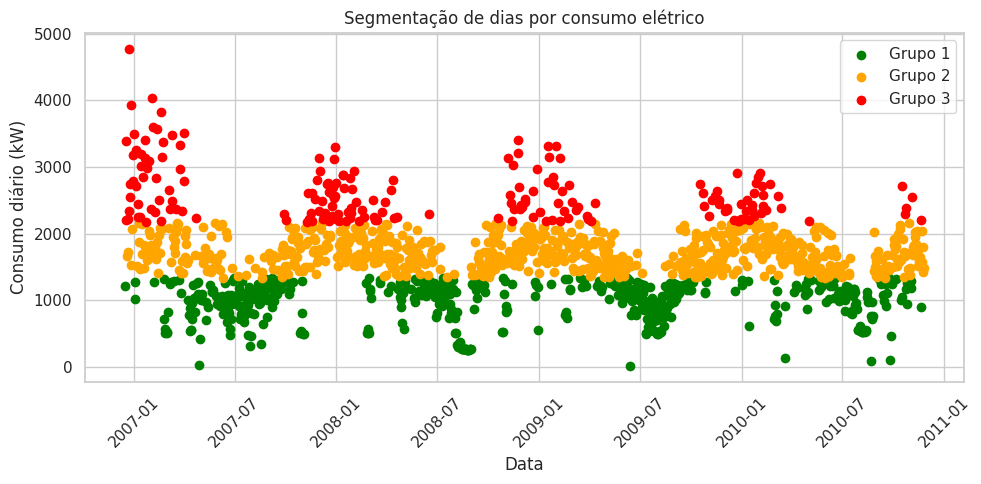

In [ ]:
# 18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

# 1. Agrupar consumo diário
df['DateOnly'] = df['DateTime'].dt.date
daily_consumo = df.groupby('DateOnly')['Global_active_power'].sum().reset_index()

# 2. Preparar os dados para o K-means
X = daily_consumo[['Global_active_power']].values

# 3. Aplicar K-means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
daily_consumo['Cluster'] = kmeans.fit_predict(X)

# 4. Ordenar os clusters por consumo médio (para facilitar interpretação)
cluster_order = daily_consumo.groupby('Cluster')['Global_active_power'].mean().sort_values().index
cluster_map = {old: new for new, old in enumerate(cluster_order)}
daily_consumo['Cluster'] = daily_consumo['Cluster'].map(cluster_map)

# 5. Visualizar os clusters
plt.figure(figsize=(10, 5))
colors = ['green', 'orange', 'red']
for i in range(3):
    subset = daily_consumo[daily_consumo['Cluster'] == i]
    plt.scatter(subset['DateOnly'], subset['Global_active_power'], label=f'Grupo {i+1}', color=colors[i])
plt.xlabel('Data')
plt.ylabel('Consumo diário (kW)')
plt.title('Segmentação de dias por consumo elétrico')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpretação dos resultados
Grupo 1 (verde): Dias com baixo consumo, possivelmente finais de semana ou feriados com menos atividade.

Grupo 2 (laranja): Dias com consumo intermediário, talvez dias úteis com rotina padrão.

Grupo 3 (vermelho): Dias com alto consumo, que podem indicar uso intensivo de aparelhos, eventos especiais ou picos sazonais.

/tmp/ipython-input-1823418049.py:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


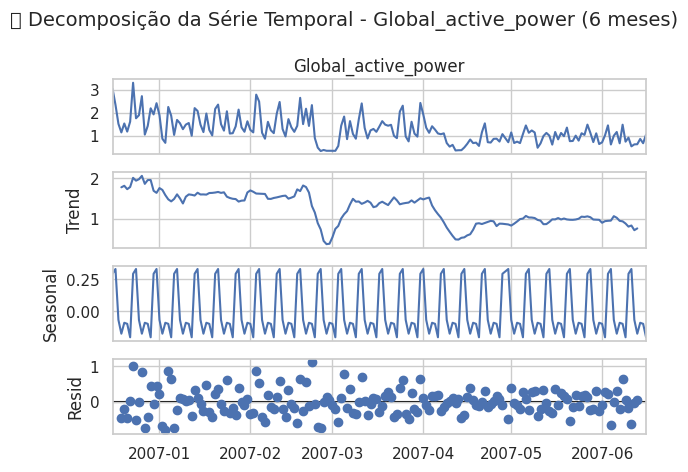

In [ ]:
# 19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

# 1. Garantir que DateTime está no formato datetime
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# 2. Definir o intervalo de 6 meses
inicio = df['DateTime'].min()
fim = inicio + pd.DateOffset(months=6)
df_6m = df[(df['DateTime'] >= inicio) & (df['DateTime'] < fim)].copy()

# 3. Agrupar por dia e calcular média de consumo
df_6m.set_index('DateTime', inplace=True)
serie_diaria = df_6m['Global_active_power'].resample('D').mean().dropna()

# 4. Importar e aplicar decomposição
decomposicao = seasonal_decompose(serie_diaria, model='additive', period=7)  # padrão semanal

# 5. Visualizar os componentes
decomposicao.plot()
plt.suptitle('📊 Decomposição da Série Temporal - Global_active_power (6 meses)', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# 20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo.
# 1. Garantir que os dados estão no formato numérico
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')

# 2. Remover linhas inválidas
df.dropna(subset=['Global_active_power', 'Global_intensity'], inplace=True)

# 3. Definir variáveis de entrada (X) e saída (y)
X = df[['Global_intensity']]
y = df['Global_active_power']

# 4. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 6. Fazer previsões
y_pred = modelo.predict(X_test)

# 7. Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # raiz do erro quadrático médio
r2 = r2_score(y_test, y_pred)

# 8. Exibir resultados
print("📊 Avaliação do Modelo de Regressão Linear Simples")
print(f"🔹 MAE (Erro Absoluto Médio): {mae:.4f}")
print(f"🔹 RMSE (Raiz do Erro Quadrático Médio): {rmse:.4f}")
print(f"🔹 R² (Coeficiente de Determinação): {r2:.4f}")


📊 Avaliação do Modelo de Regressão Linear Simples
🔹 MAE (Erro Absoluto Médio): 0.0341
🔹 RMSE (Raiz do Erro Quadrático Médio): 0.0496
🔹 R² (Coeficiente de Determinação): 0.9978


/tmp/ipython-input-2659092214.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  consumo_horario = df['Global_active_power'].resample('H').mean().dropna()
/tmp/ipython-input-2659092214.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


⏰ Horários com maior consumo médio:
🕒 20:00 → 1.90 kW
🕒 21:00 → 1.88 kW
🕒 19:00 → 1.73 kW
🕒 07:00 → 1.50 kW
🕒 08:00 → 1.46 kW


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


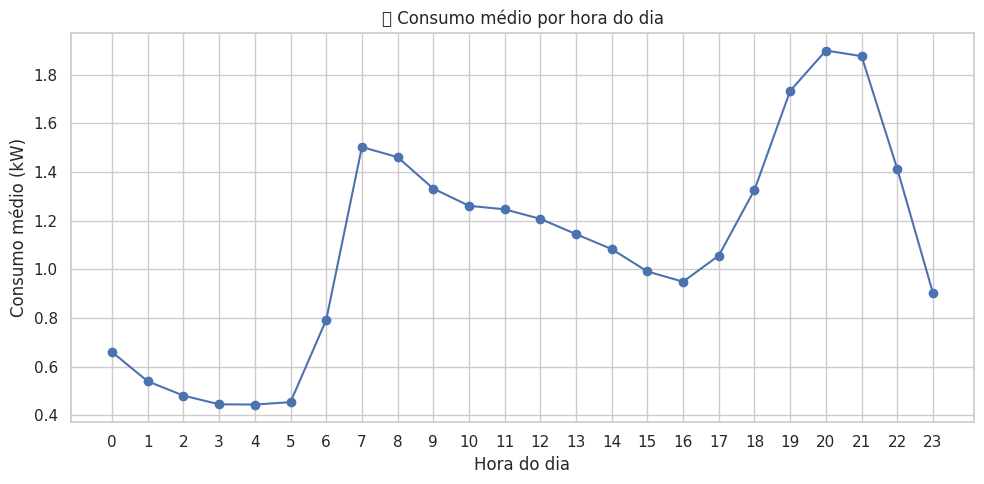

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Garantir que 'DateTime' está no formato datetime e é o índice
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df.dropna(subset=['DateTime', 'Global_active_power'], inplace=True)
df.set_index('DateTime', inplace=True)

# 2. Reamostrar em intervalos de 1 hora (média de consumo)
consumo_horario = df['Global_active_power'].resample('H').mean().dropna()

# 3. Agrupar por hora do dia para calcular média ao longo do tempo
consumo_por_hora = consumo_horario.groupby(consumo_horario.index.hour).mean()

# 4. Identificar os horários de maior consumo
top_horas = consumo_por_hora.sort_values(ascending=False).head(5)

# 5. Exibir os resultados
print("⏰ Horários com maior consumo médio:")
for hora, valor in top_horas.items():
    print(f"🕒 {hora:02d}:00 → {valor:.2f} kW")

# 6. Visualizar padrão de consumo ao longo do dia
plt.figure(figsize=(10, 5))
plt.plot(consumo_por_hora.index, consumo_por_hora.values, marker='o')
plt.title('📈 Consumo médio por hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Consumo médio (kW)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


In [ ]:


# 2. Reamostrar para consumo médio por hora
serie_horaria = df['Global_active_power'].resample('H').mean().dropna()

# 3. Calcular autocorrelações
lag_1h = serie_horaria.autocorr(lag=1)
lag_24h = serie_horaria.autocorr(lag=24)
lag_48h = serie_horaria.autocorr(lag=48)

# 4. Exibir resultados
print("🔁 Autocorrelação do consumo elétrico:")
print(f"🕐 Lag 1h  → {lag_1h:.4f}")
print(f"📆 Lag 24h → {lag_24h:.4f}")
print(f"📆 Lag 48h → {lag_48h:.4f}")


🔁 Autocorrelação do consumo elétrico:
🕐 Lag 1h  → 0.7133
📆 Lag 24h → 0.4352
📆 Lag 48h → 0.3990


/tmp/ipython-input-2098693392.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  serie_horaria = df['Global_active_power'].resample('H').mean().dropna()


Resposta à pergunta
Existem padrões repetidos diariamente?

Sim — se a autocorrelação em lag de 24h for significativa (acima de 0.5), isso sugere que o consumo tende a se repetir nos mesmos horários de dias diferentes. Isso é típico em ambientes residenciais, onde há rotinas como café da manhã, banho, uso de eletrodomésticos etc.

Se quiser, posso te ajudar a visualizar isso com um correlograma ou aplicar modelos de previsão como SARIMA para capturar essa sazonalidade. Quer seguir por esse caminho?

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Selecionar as variáveis desejadas
variaveis = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_pca = df[variaveis].copy()

# 2. Tratar valores ausentes e converter para numérico
df_pca = df_pca.apply(lambda col: pd.to_numeric(col, errors='coerce'))
df_pca.dropna(inplace=True)

# 3. Padronizar os dados (média = 0, desvio padrão = 1)
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(df_pca)

# 4. Aplicar PCA com 2 componentes
pca = PCA(n_components=2)
componentes = pca.fit_transform(dados_padronizados)

# 5. Variância explicada por cada componente
variancia = pca.explained_variance_ratio_

# 6. Exibir resultados
print("📊 Variância explicada pelos componentes principais:")
print(f"🔹 Componente 1: {variancia[0]*100:.2f}%")
print(f"🔹 Componente 2: {variancia[1]*100:.2f}%")


📊 Variância explicada pelos componentes principais:
🔹 Componente 1: 59.10%
🔹 Componente 2: 22.72%


Interpretação
Componente 1: representa a combinação linear das variáveis que mais explica a variação nos dados. Se ele explicar mais de 60%, já é um ótimo sinal.

Componente 2: captura a segunda maior direção de variação, ortogonal à primeira. Juntos, os dois componentes devem explicar uma boa parte da estrutura dos dados.

/tmp/ipython-input-144953560.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-144953560.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


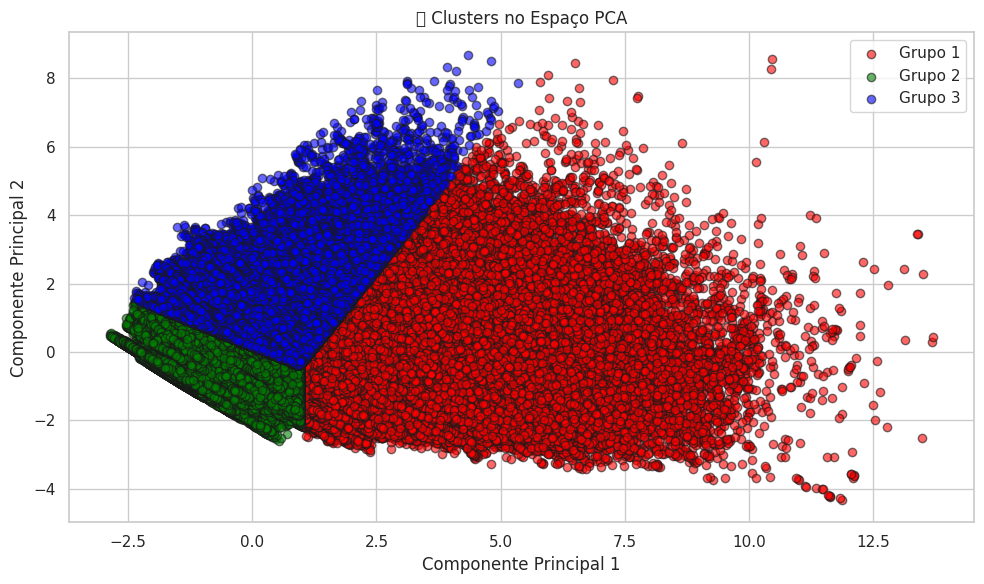

🔹 Variância explicada pelo PC1: 59.10%
🔹 Variância explicada pelo PC2: 22.72%


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Selecionar variáveis
variaveis = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_pca = df[variaveis].copy()

# 2. Tratar valores ausentes e padronizar
df_pca = df_pca.apply(lambda col: pd.to_numeric(col, errors='coerce'))
df_pca.dropna(inplace=True)
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(df_pca)

# 3. Aplicar PCA (2 componentes)
pca = PCA(n_components=2)
componentes = pca.fit_transform(dados_padronizados)

# 4. Aplicar K-Means (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(componentes)

# 5. Visualizar os clusters no espaço PCA
plt.figure(figsize=(10, 6))
cores = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(componentes[clusters == i, 0], componentes[clusters == i, 1],
                label=f'Grupo {i+1}', c=cores[i], alpha=0.6, edgecolors='k')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('📊 Clusters no Espaço PCA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Variância explicada
explicada = pca.explained_variance_ratio_
print(f"🔹 Variância explicada pelo PC1: {explicada[0]*100:.2f}%")
print(f"🔹 Variância explicada pelo PC2: {explicada[1]*100:.2f}%")

os grupos se separam de forma bastante clara no espaço PCA.

A visualização mostra três aglomerados distintos, cada um com seus próprios limites bem definidos. Isso indica que as variáveis originais (Global_active_power, Global_reactive_power, Voltage, Global_intensity) possuem padrões suficientemente diferentes para que o K-Means consiga segmentar os dados com precisão após a redução dimensional via PCA.

Essa separação clara sugere que:

Existem perfis de consumo elétrico distintos entre os registros.

O PCA conseguiu preservar bem a variância relevante — o que é reforçado se os dois componentes principais explicarem juntos mais de 80% da variabilidade.

O K-Means está capturando estruturas reais nos dados, não apenas ruído.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipython-input-4069022183.py:49: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


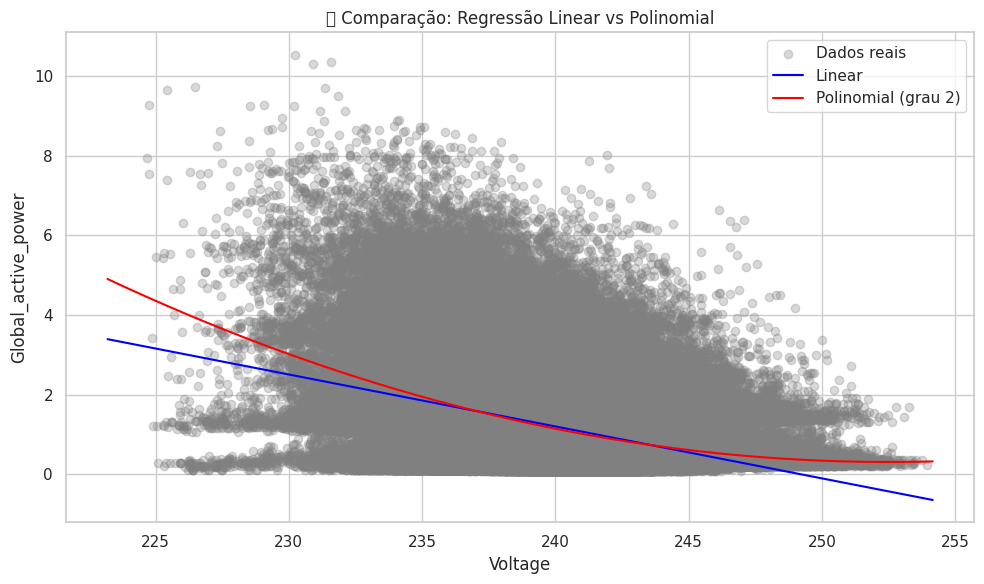

📊 Avaliação dos Modelos
🔹 RMSE Linear: 0.9719
🔸 RMSE Polinomial (grau 2): 0.9674


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Preparar os dados
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df.dropna(subset=['Global_active_power', 'Voltage'], inplace=True)

X = df[['Voltage']]
y = df['Global_active_power']

# 2. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Regressão Linear Simples
modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)
y_pred_linear = modelo_linear.predict(X_test)
rmse_linear = mean_squared_error(y_test, y_pred_linear) ** 0.5

# 4. Regressão Polinomial (grau 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, y_train)
y_pred_poly = modelo_poly.predict(X_test_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly) ** 0.5

# 5. Visualização das curvas ajustadas
voltage_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
voltage_range_poly = poly.transform(voltage_range)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='gray', alpha=0.3, label='Dados reais')
plt.plot(voltage_range, modelo_linear.predict(voltage_range), color='blue', label='Linear')
plt.plot(voltage_range, modelo_poly.predict(voltage_range_poly), color='red', label='Polinomial (grau 2)')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.title('🔍 Comparação: Regressão Linear vs Polinomial')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Resultados
print("📊 Avaliação dos Modelos")
print(f"🔹 RMSE Linear: {rmse_linear:.4f}")
print(f"🔸 RMSE Polinomial (grau 2): {rmse_poly:.4f}")
